In [5]:
from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('customer.csv')
# df.isnull().sum()
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
df

,customer_id,age,gender,income,category
0,1,35,M,50000,0
1,2,45,F,60000,1
2,3,28,M,30000,2
3,4,50,F,70000,1
4,5,40,M,55000,0
...,...,...,...,...,...
95,96,49,F,71000,1
96,97,35,M,47000,0
97,98,46,F,69000,1
98,99,39,M,59000,0


Text(0, 0.5, 'Category')

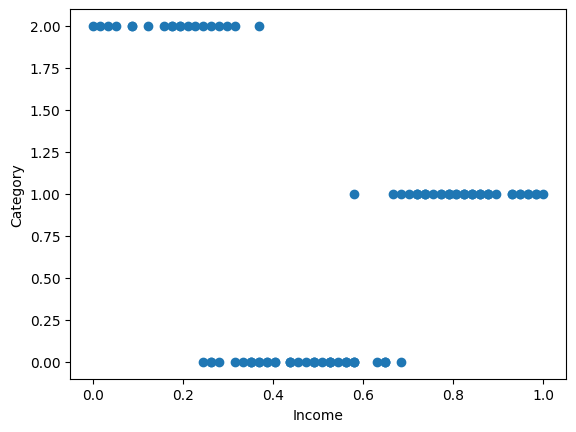

In [14]:
plt.scatter(df['income'],df['category'])
plt.xlabel('Income')
plt.ylabel('Category')

In [15]:
scalar = MinMaxScaler()

scalar.fit(df[['income']])
df['income'] = scalar.transform(df[['income']])

scalar.fit(df[['category']])
df['category'] = scalar.transform(df[['category']])
df


,customer_id,age,gender,income,category,cluster,Cluster_Name
0,1,35,M,0.403509,0.0,1,cluster 2
1,2,45,F,0.578947,0.5,0,cluster 1
2,3,28,M,0.052632,1.0,2,cluster 3
3,4,50,F,0.754386,0.5,0,cluster 1
4,5,40,M,0.491228,0.0,1,cluster 2
...,...,...,...,...,...,...,...
95,96,49,F,0.771930,0.5,0,cluster 1
96,97,35,M,0.350877,0.0,1,cluster 2
97,98,46,F,0.736842,0.5,0,cluster 1
98,99,39,M,0.561404,0.0,1,cluster 2


In [16]:
km = KMeans(n_clusters=3)
prediction = km.fit_predict(df[['category','income']])
prediction

array([1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2,
       0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2,
       1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0], dtype=int32)

In [17]:
df['cluster'] = prediction
df

,customer_id,age,gender,income,category,cluster,Cluster_Name
0,1,35,M,0.403509,0.0,1,cluster 2
1,2,45,F,0.578947,0.5,2,cluster 1
2,3,28,M,0.052632,1.0,0,cluster 3
3,4,50,F,0.754386,0.5,2,cluster 1
4,5,40,M,0.491228,0.0,1,cluster 2
...,...,...,...,...,...,...,...
95,96,49,F,0.771930,0.5,2,cluster 1
96,97,35,M,0.350877,0.0,1,cluster 2
97,98,46,F,0.736842,0.5,2,cluster 1
98,99,39,M,0.561404,0.0,1,cluster 2


In [18]:
cluster_names = {
    0:'cluster 1',
    1:'cluster 2',
    2:'cluster 3',
    3:'cluster 4'
}
df['Cluster_Name'] = df['cluster'].map(cluster_names)
df

,customer_id,age,gender,income,category,cluster,Cluster_Name
0,1,35,M,0.403509,0.0,1,cluster 2
1,2,45,F,0.578947,0.5,2,cluster 3
2,3,28,M,0.052632,1.0,0,cluster 1
3,4,50,F,0.754386,0.5,2,cluster 3
4,5,40,M,0.491228,0.0,1,cluster 2
...,...,...,...,...,...,...,...
95,96,49,F,0.771930,0.5,2,cluster 3
96,97,35,M,0.350877,0.0,1,cluster 2
97,98,46,F,0.736842,0.5,2,cluster 3
98,99,39,M,0.561404,0.0,1,cluster 2


In [12]:
km.cluster_centers_

array([[ 1.00000000e+00],
       [-3.33066907e-16],
       [ 2.00000000e+00]])

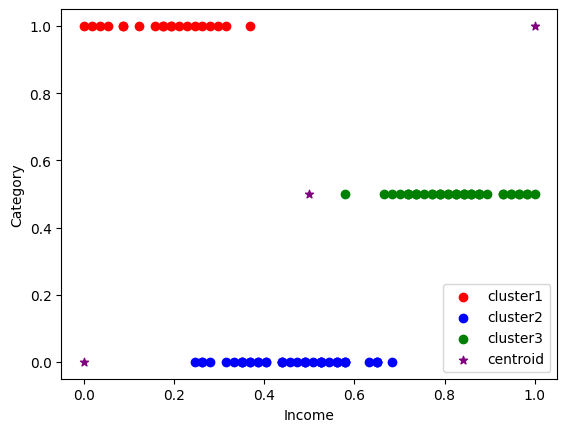

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.income,df1['category'],color='red',label='cluster1')
plt.scatter(df2.income,df2['category'],color='blue',label='cluster2')
plt.scatter(df3.income,df3['category'],color='green',label='cluster3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,0],color='purple',marker='*',label='centroid')
plt.xlabel('Income')
plt.ylabel('Category')
plt.legend()

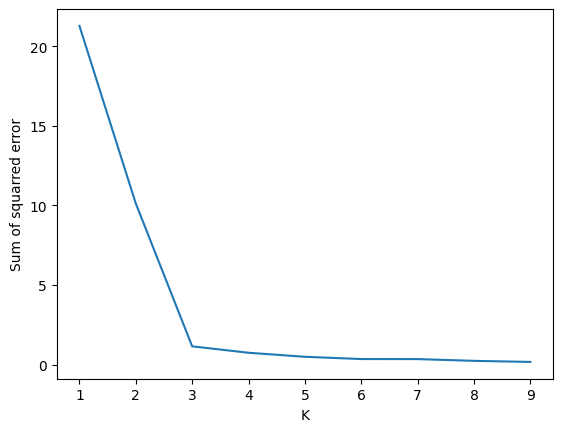

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','category']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squarred error')
plt.plot(k_rng,sse)